In [1]:
import sys
sys.path.append("estimators")
sys.path.append("simulations")

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
from estimators_RKHS import *

In [4]:
from generation import *

In [5]:
def function_gamma(gamma):
    mod = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': gamma})

    mod.estimate_pi_ipr()
    mod.compute_K2()
    mod.compute_tau_plug_in()
    mod.estimate_variance_plug_in()

    return mod.var_plug_in_n

In [6]:
var_seq = np.zeros(100)
gamma_seq = np.zeros(100)
var_seq_gamma_p = np.zeros(100)

In [7]:
for i in range(100):
    p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=i)
    res = minimize(function_gamma, x0=1/5)
    var_seq[i] = res['fun']
    gamma_seq[i] = res['x'][0]

    var_seq_gamma_p[i] = function_gamma(1/5)

In [8]:
p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=123)

In [9]:
gamma_seq_try = np.linspace(0.001,0.2001, 100)
var_seq_try = [function_gamma(i) for i in gamma_seq_try]

In [10]:
res = minimize(function_gamma, x0=1/5)

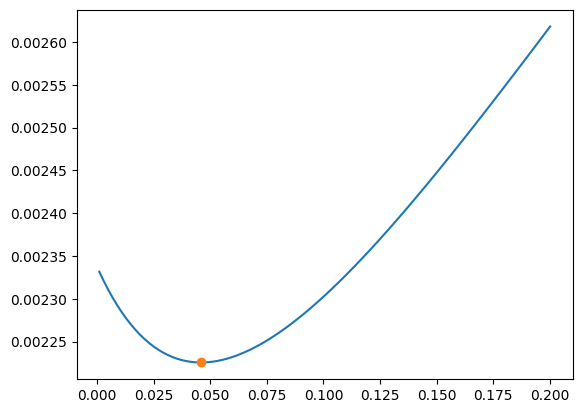

In [11]:
plt.plot(gamma_seq_try, var_seq_try)
plt.plot(res['x'][0], res['fun'], 'o')

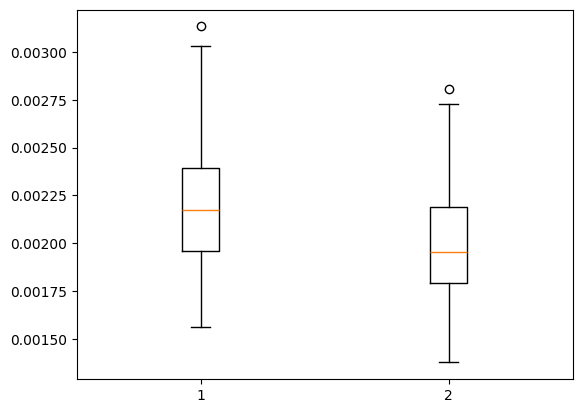

In [12]:
plt.boxplot([var_seq_gamma_p, var_seq])
plt.show()

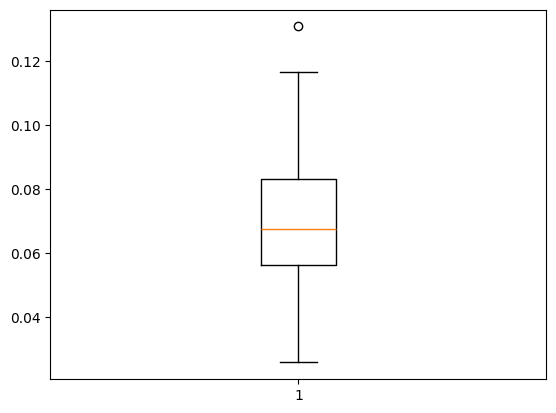

In [13]:
plt.boxplot(gamma_seq)
plt.show()

In [14]:
function_gamma(1/5)

np.float64(0.002617724409630381)

In [15]:
res = minimize(function_gamma, x0=1/5)

In [16]:
res['fun']

np.float64(0.0022254945621716375)

In [17]:
res['x'][0]

np.float64(0.04587177091166653)

In [18]:
p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=123)

In [19]:
mod = estimator_RHKS_rbf_gamma(p_target, p_source_plus, p_source_minus)

In [20]:
mod.compute_basic_simulations()

In [21]:
mod.var_plug_in_n

np.float64(0.0022254945621716375)